# AMPEL intro II: Using a full filter class

This notebook describes how to import an external Tier 0 unit (filter) and optimize filter selection through changing the run configuration. It is intended to be examined after the `t0_unit_example` notebook.

In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

We will here import an externally defined python module. 
New filters can be created next to the `SampleFilter` and similarly imported. After validation these can
be used in a live Ampel instance. 
The process for doing this is to implement this new filter in a forked repository. The filter namespace
is defined in the `setup.py` file. After this a filter can be invoked directly in the channel.json
configuration file through the name (i.e. `SampleFilter`).


In [2]:
from ampel.contrib.groupname.t0.SampleFilter import SampleFilter

The full behaviour of a T0 unit is controlled by a set of parameters provided as `run_config`. We here directly specify these as a dictionary. When implemented for a live channel these constitue one entry to the `channel.json` main configuration file.

In [3]:
run_config = {
    'MIN_NDET' : 4,					# number of previous detections
    'MAX_FWHM' : 2,					# sexctrator FWHM (assume Gaussian) [pix]
    'MAX_MAGDIFF':1.5,				# Difference: magap - magpsf [mag]
    'MAX_NBAD':1,					# number of bad pixels in a 5 x 5 pixel stamp
    'GAIA_RS':0,					# search radius for GAIA DR2 matching [arcsec]
    'GAIA_PM_SIGNIF':3,			# significance of proper motion detection of GAIA counterpart [sigma]
    'GAIA_PLX_SIGNIF':3,			# significance of parallax detection of GAIA counterpart [sigma]
}
on_match_t2_units = ["T2ExamplePolyFit_5D"]

In [4]:
import os
import urllib.request

small_test_tar_url = 'https://ztf.uw.edu/alerts/public/ztf_public_20181129.tar.gz'
small_test_tar_path = 'ztf_public_20181129.tar.gz'

if not os.path.isfile(small_test_tar_path):
    print('Downloading tar')
    urllib.request.urlretrieve(small_test_tar_url, small_test_tar_path)


In [5]:
from ampel.ztf.pipeline.t0.DevAlertProcessor import DevAlertProcessor

my_filter = SampleFilter(on_match_t2_units, run_config=run_config, logger=logger)
dap = DevAlertProcessor(my_filter, use_dev_alerts=True)

In [6]:
import time

print ("processing alerts from %s" % small_test_tar_path)
start = time.time()
nproc = dap.process_tar(small_test_tar_path, iter_max=200)
end = time.time()
print ("processed %d alerts in %.2e sec"%(nproc, end-start))

processing alerts from ztf_public_20181129.tar.gz
2019-06-21 18:12:02 INFO + Ingesting 697251924815010000 (objectId: ZTF18abvetqi)
2019-06-21 18:12:02 INFO - Rejecting 697252380615010002 (objectId: ZTF18abryrxy)
2019-06-21 18:12:02 INFO - Rejecting 697251920615010004 (objectId: ZTF18abvryvj)
2019-06-21 18:12:02 INFO - Rejecting 697251920415015001 (objectId: ZTF18abvdmcb)
2019-06-21 18:12:02 INFO - Rejecting 697251920815010007 (objectId: ZTF18abvlvih)
2019-06-21 18:12:02 INFO - Rejecting 697251922015015007 (objectId: ZTF18acsbjvl)
2019-06-21 18:12:02 INFO - Rejecting 697252841015015004 (objectId: ZTF18acsbtce)
2019-06-21 18:12:02 INFO - Rejecting 697252842115015000 (objectId: ZTF18acsbtei)
2019-06-21 18:12:02 INFO - Rejecting 697252842615015009 (objectId: ZTF18acsbtfc)
2019-06-21 18:12:02 INFO - Rejecting 697252382215010000 (objectId: ZTF18acsbthc)
2019-06-21 18:12:02 INFO - Rejecting 697252841315015005 (objectId: ZTF18acsbthq)
2019-06-21 18:12:02 INFO - Rejecting 697252381715010004 (ob

2019-06-21 18:12:03 INFO - Rejecting 697252382015015001 (objectId: ZTF18acsbtho)
2019-06-21 18:12:03 INFO - Rejecting 697252381715010006 (objectId: ZTF18acsbtjv)
2019-06-21 18:12:03 INFO - Rejecting 697252381615015002 (objectId: ZTF18abrabqy)
2019-06-21 18:12:03 INFO - Rejecting 697252381115015002 (objectId: ZTF18abscksd)
2019-06-21 18:12:03 INFO + Ingesting 697251923115010004 (objectId: ZTF18abvrzta)
2019-06-21 18:12:03 INFO - Rejecting 697251926015015004 (objectId: ZTF18acsbjnc)
2019-06-21 18:12:03 INFO + Ingesting 697251921415015003 (objectId: ZTF18abvethj)
2019-06-21 18:12:03 INFO - Rejecting 697251920415010000 (objectId: ZTF18acsbjou)
2019-06-21 18:12:03 INFO - Rejecting 697251920815010004 (objectId: ZTF18abvdmfx)
2019-06-21 18:12:03 INFO - Rejecting 697251922515015010 (objectId: ZTF18acgbarm)
2019-06-21 18:12:03 INFO - Rejecting 697252841015015012 (objectId: ZTF18abslhsh)
2019-06-21 18:12:03 INFO + Ingesting 697252842715010000 (objectId: ZTF18absqged)
2019-06-21 18:12:03 INFO - R

In [7]:
n_good, n_bad = len(dap.get_accepted_alerts()), len(dap.get_rejected_alerts())
print ("%d alerts accepted by the filter (%.2f perc)"%(n_good, 100*n_good/nproc))
print ("%d alerts rejected by the filter (%.2f perc)"%(n_bad, 100*n_bad/nproc))

20 alerts accepted by the filter (10.00 perc)
180 alerts rejected by the filter (90.00 perc)


In [8]:
from ampel.ztf.view.AmpelAlertPlotter import AmpelAlertPlotter
from random import choice

accepted = dap.get_accepted_alerts()
accepted_plot = AmpelAlertPlotter(interactive=True)

2019-06-21 18:13:33 INFO Initialized AmpelAlertPlotter in interactive mode.


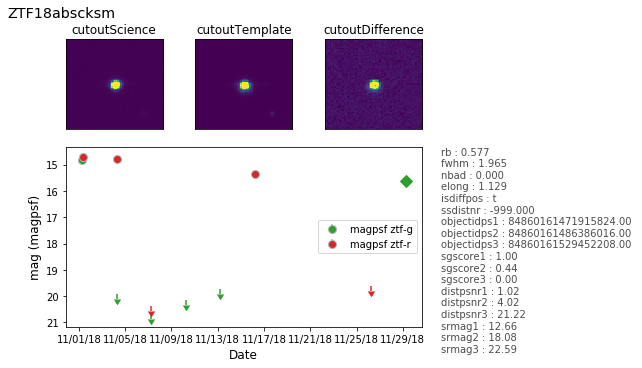

In [9]:
accepted_plot.summary_plot(choice(accepted))